# Hackaton IT-volontaire 25.07.2022 - 02.08.2022
## Задача 2. Бухгалтерская отчетность
### Ментор — Михаил Белоус

Из Росстата получены данные бухгалтерской отчетности всех действующих на май 2022 года фондов в России:

- Благотворительные фонды (ОКОПФ 070401)
- Общественные фонды (ОКОПФ 070403)
- Экологические фонды (ОКОПФ 070404)

Данные представлены за 2017-2021 годы. Считаем, что если в данных нет сведений по отчетности за какой-то год, это означает, что организация не предоставила отчетность за этот год.

- Очистить и описать данные
- Для тех организаций, которые подали отчетность, узнать, есть ли связь между материальным благополучием фонда и количеством штатных работников
- Определить факторы, влияющие на закредитованность, финансовое благополучие организации
- Любые дополнительные выводы и проверки

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('moscow.xlsx', sheet_name=1, header=3)
df.head()

,№,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,...,"2017, Всего использовано средств, RUB","2018, Всего использовано средств, RUB","2019, Всего использовано средств, RUB","2020, Всего использовано средств, RUB","2021, Всего использовано средств, RUB","2017, Остаток средств на конец отчетного года, RUB","2018, Остаток средств на конец отчетного года, RUB","2019, Остаток средств на конец отчетного года, RUB","2020, Остаток средств на конец отчетного года, RUB","2021, Остаток средств на конец отчетного года, RUB"
0,1,"101 КИЛОМЕТР. ПОДВИЖНИКИ МАЛОЯРОСЛАВЦА, БФ",1.167700e+12,2016-05-24 00:00:00,Действующая,7.728340e+09,Москва,45293598000,"Москва, Юго-Западный, Ясенево",4.591000e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"12, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1.157700e+12,2015-01-23 00:00:00,Действующая,7.714327e+09,Москва,45277598000,"Москва, Северный, Хорошевский",4.534800e+10,...,26152000.0,37596000.0,55565000.0,100240000.0,66550000.0,264000.0,182000.0,113857000.0,311245000.0,424930000.0
2,3,"1ПОМОГАЕТ, БФ",1.167700e+12,2016-04-28 00:00:00,Действующая,9.718006e+09,Москва,45263552000,"Москва, Восточный, Богородское",4.530100e+10,...,1458000.0,2559000.0,4027000.0,8474000.0,7814000.0,132000.0,1208000.0,1105000.0,898000.0,2313000.0
3,4,"3Д, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1.197700e+12,2019-08-13 00:00:00,Действующая,9.703000e+09,Москва,45286575000,"Москва, Центральный, Пресненский",4.538000e+10,...,NaN,NaN,213000.0,96000.0,35000.0,NaN,NaN,39000.0,43000.0,8000.0
4,5,"459 ОРСПН, ФОНД",1.217700e+12,2021-10-06 00:00:00,Действующая,9.721146e+09,Москва,45290578000,"Москва, Юго-Восточный, Нижегородский",4.539200e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Удаляем ненужные признаки

In [4]:
df.drop(['№', 'Регион регистрации', 'Код ОКАТО', 'Код ОКТМО', 'Код ОКОПФ', 'Код налогоплательщика'], axis=1, inplace=True)

In [5]:
df.shape

(3647, 156)

In [6]:
display(df.isnull().mean() * 100)

Наименование                                           0.000000
Регистрационный номер                                  0.054840
Дата регистрации                                       0.000000
Статус                                                 0.000000
Наименование ОКАТО                                     0.000000
                                                        ...    
2017, Остаток средств на конец отчетного года, RUB    80.285166
2018, Остаток средств на конец отчетного года, RUB    75.431862
2019, Остаток средств на конец отчетного года, RUB    71.894708
2020, Остаток средств на конец отчетного года, RUB    70.578558
2021, Остаток средств на конец отчетного года, RUB    71.044694
Length: 156, dtype: float64

In [7]:
df.head(3)

,Наименование,Регистрационный номер,Дата регистрации,Статус,Наименование ОКАТО,Организационно-правовая форма,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2019, Среднесписочная численность работников","2020, Среднесписочная численность работников",...,"2017, Всего использовано средств, RUB","2018, Всего использовано средств, RUB","2019, Всего использовано средств, RUB","2020, Всего использовано средств, RUB","2021, Всего использовано средств, RUB","2017, Остаток средств на конец отчетного года, RUB","2018, Остаток средств на конец отчетного года, RUB","2019, Остаток средств на конец отчетного года, RUB","2020, Остаток средств на конец отчетного года, RUB","2021, Остаток средств на конец отчетного года, RUB"
0,"101 КИЛОМЕТР. ПОДВИЖНИКИ МАЛОЯРОСЛАВЦА, БФ",1.167700e+12,2016-05-24 00:00:00,Действующая,"Москва, Юго-Западный, Ясенево",Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"12, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1.157700e+12,2015-01-23 00:00:00,Действующая,"Москва, Северный, Хорошевский",Благотворительные фонды,NaN,NaN,NaN,NaN,...,26152000.0,37596000.0,55565000.0,100240000.0,66550000.0,264000.0,182000.0,113857000.0,311245000.0,424930000.0
2,"1ПОМОГАЕТ, БФ",1.167700e+12,2016-04-28 00:00:00,Действующая,"Москва, Восточный, Богородское",Благотворительные фонды,0 - 5,NaN,NaN,NaN,...,1458000.0,2559000.0,4027000.0,8474000.0,7814000.0,132000.0,1208000.0,1105000.0,898000.0,2313000.0


### Выделим из признака "Наименование ОКАТО" отдельно район Москвы и его расположение

In [8]:
def get_parse_direction(location):
    location = location.split(', ')[1:]
    if len(location):
        return location[0]
    else:
        return ''

def get_parse_location_name(location):
    location = location.split(', ')[1:]
    if len(location) == 2:
        return location[1]
    else:
        return ''
    

In [9]:
df['direction'] = df['Наименование ОКАТО'].apply(get_parse_direction)
df['location_name'] = df['Наименование ОКАТО'].apply(get_parse_location_name)

df.drop(['Наименование ОКАТО'], axis=1, inplace=True)

In [10]:
df[['direction', 'location_name']].head()

,direction,location_name
0,Юго-Западный,Ясенево
1,Северный,Хорошевский
2,Восточный,Богородское
3,Центральный,Пресненский
4,Юго-Восточный,Нижегородский


### Заполним пропуски пока нулями, в интересующих нас столбцах

In [11]:
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    
    # всего поступило средств EC, ED, EE, EF, EG
    '2017, Всего поступило средств, RUB': 0,
    '2018, Всего поступило средств, RUB': 0,
    '2019, Всего поступило средств, RUB': 0,
    '2020, Всего поступило средств, RUB': 0,
    '2021, Всего поступило средств, RUB': 0,
    # всего использовано средств EW, EX, EY, EZ, FA
    '2017, Всего использовано средств, RUB': 0,
    '2018, Всего использовано средств, RUB': 0,
    '2019, Всего использовано средств, RUB': 0,
    '2020, Всего использовано средств, RUB': 0,
    '2021, Всего использовано средств, RUB': 0,   
    # остаток средств на конец отчетного года FB, FC, FD, FE, FF
    '2017, Остаток средств на конец отчетного года, RUB': 0,
    '2018, Остаток средств на конец отчетного года, RUB': 0,
    '2019, Остаток средств на конец отчетного года, RUB': 0,
    '2020, Остаток средств на конец отчетного года, RUB': 0,
    '2021, Остаток средств на конец отчетного года, RUB': 0,
    
    # EH + EM + ER = всего использовано средств 2017
    # Ei + EN + ES = всего использовано средств 2017
    
    # расходы на целевые мероприятия EH, EI, EJ, EK, EL
    '2017, Расходы на целевые мероприятия, RUB': 0,
    '2018, Расходы на целевые мероприятия, RUB': 0,
    '2019, Расходы на целевые мероприятия, RUB': 0,
    '2020, Расходы на целевые мероприятия, RUB': 0,
    '2021, Расходы на целевые мероприятия, RUB': 0,
    
    # расходы на содержание аппарата управления EM, EN, EO, EP, EQ
    '2017, Расходы на содержание аппарата управления, RUB': 0,
    '2018, Расходы на содержание аппарата управления, RUB': 0,
    '2019, Расходы на содержание аппарата управления, RUB': 0,
    '2020, Расходы на содержание аппарата управления, RUB': 0,
    '2021, Расходы на содержание аппарата управления, RUB': 0,
    
    
    # приобретение основных средств, инвентаря и иного имущества ER, ES, ET, EU, EV
    '2017, Приобретение основных средств, инвентаря и иного имущества, RUB': 0,
    '2018, Приобретение основных средств, инвентаря и иного имущества, RUB': 0,
    '2019, Приобретение основных средств, инвентаря и иного имущества, RUB': 0,
    '2020, Приобретение основных средств, инвентаря и иного имущества, RUB': 0,
    '2021, Приобретение основных средств, инвентаря и иного имущества, RUB': 0,
    
    '2017, Среднесписочная численность работников': 0,
    '2018, Среднесписочная численность работников': 0
    
}
#заполняем пропуски в соответствии с заявленным словарем
df = df.fillna(values)
#выводим результирующую долю пропусков
df.isnull().mean()

Наименование                                          0.000000
Регистрационный номер                                 0.000548
Дата регистрации                                      0.000000
Статус                                                0.000000
Организационно-правовая форма                         0.000000
                                                        ...   
2019, Остаток средств на конец отчетного года, RUB    0.000000
2020, Остаток средств на конец отчетного года, RUB    0.000000
2021, Остаток средств на конец отчетного года, RUB    0.000000
direction                                             0.000000
location_name                                         0.000000
Length: 157, dtype: float64

### Преобразуем признак с численностью сотрудников в удобный вид

In [12]:
def get_employees(persons):
    if persons == 0:
        return 0
    if persons == '0 - 5':
        return 5
    elif persons == '6 - 10':
        return 10
    elif persons == '16 - 50':
        return 50
    elif persons == '51 - 100':
        return 100
    elif persons == '101 - 150':
        return 150
    elif persons == '151 - 200':
        return 200
    elif persons == '201 - 250':
        return 250
    elif persons == '201 - 250':
        return 250
    elif persons == '251 - 500':
        return 500
    elif persons == '501 - 1000':
        return 1000
    

In [13]:
df['2017 employees'] = df['2017, Среднесписочная численность работников'].apply(get_employees)
df['2018 employees'] = df['2018, Среднесписочная численность работников'].apply(get_employees)

df['2017 balance'] = df['2017, Остаток средств на конец отчетного года, RUB']/1e9
df['2018 balance'] = df['2018, Остаток средств на конец отчетного года, RUB']/1e9
df['2019 balance'] = df['2019, Остаток средств на конец отчетного года, RUB']/1e9
df['2020 balance'] = df['2020, Остаток средств на конец отчетного года, RUB']/1e9
df['2021 balance'] = df['2021, Остаток средств на конец отчетного года, RUB']/1e9

df.drop([
    '2017, Остаток средств на конец отчетного года, RUB',
    '2018, Остаток средств на конец отчетного года, RUB',
    '2019, Остаток средств на конец отчетного года, RUB',
    '2020, Остаток средств на конец отчетного года, RUB',
    '2021, Остаток средств на конец отчетного года, RUB',
    '2017, Среднесписочная численность работников',
    '2018, Среднесписочная численность работников',
    '2019, Среднесписочная численность работников',
    '2020, Среднесписочная численность работников',
    '2021, Среднесписочная численность работников'], axis=1, inplace=True)

### Проверим идею 
о том что материальное благополучие фонда - это эквивалент “остатку средств на конец отчетного года”, а выплаты работникам определяются (входят в), как “расходы на содержание аппарата управления”, то расчет мат. благополучия фонда можно рассчитать:

“всего поступило средств” (Excel столбец - EC, ED)- “всего использовано средств” (EW, EX)= “остаток средств на конец отчетного года” (FB, FC). (положительное сальдо на начало следующего отчетного года)

“расходы на целевые мероприятия” (EH, Ei)+ “расходы на содержание аппарата управления” (EM, EN)+ “приобретение основных средств, инвентаря и иного имущества” (ER, ES) + n(расходы) (неопределенная переменная) = “всего использовано средств”

“всего поступило средств” > “расходы на целевые мероприятия” + “расходы на содержание аппарата управления” + “приобретение основных средств, инвентаря и иного имущества” - положительное материальное состояние фонда.

## Вариант 1
### Вычислим благосостояние как разницу между всеми поступившими средствами и суммой расходов.
все эти показатели вычисляем в млрд руб, как и остаток стредств в предыдущем пункте

In [14]:
df['2017 well_being'] = (df['2017, Всего поступило средств, RUB']\
    - (df['2017, Расходы на целевые мероприятия, RUB'] \
        + df['2017, Расходы на содержание аппарата управления, RUB'] \
            + df['2017, Приобретение основных средств, инвентаря и иного имущества, RUB']))/1e9
    
df['2018 well_being'] = (df['2018, Всего поступило средств, RUB']\
    - (df['2018, Расходы на целевые мероприятия, RUB'] \
        + df['2018, Расходы на содержание аппарата управления, RUB'] \
            + df['2018, Приобретение основных средств, инвентаря и иного имущества, RUB']))/1e9

df['2019 well_being'] = (df['2019, Всего поступило средств, RUB']\
    - (df['2019, Расходы на целевые мероприятия, RUB'] \
        + df['2019, Расходы на содержание аппарата управления, RUB'] \
            + df['2019, Приобретение основных средств, инвентаря и иного имущества, RUB']))/1e9

df['2020 well_being'] = (df['2020, Всего поступило средств, RUB']\
    - (df['2020, Расходы на целевые мероприятия, RUB'] \
        + df['2020, Расходы на содержание аппарата управления, RUB'] \
            + df['2020, Приобретение основных средств, инвентаря и иного имущества, RUB']))/1e9

df['2021 well_being'] = (df['2021, Всего поступило средств, RUB']\
    - (df['2021, Расходы на целевые мероприятия, RUB'] \
        + df['2021, Расходы на содержание аппарата управления, RUB'] \
            + df['2021, Приобретение основных средств, инвентаря и иного имущества, RUB']))/1e9

## Вариант 2
### Другой вариант расчета благосостояния: разница между всеми поступившими средствами и графой всего использовано средств

In [15]:
df['2017 well_being2'] = (df['2017, Всего поступило средств, RUB'] - df['2017, Всего использовано средств, RUB'])/1e9
    
df['2018 well_being2'] = (df['2018, Всего поступило средств, RUB'] - df['2018, Всего использовано средств, RUB'])/1e9

df['2019 well_being2'] = (df['2019, Всего поступило средств, RUB'] - df['2019, Всего использовано средств, RUB'])/1e9

df['2020 well_being2'] = (df['2020, Всего поступило средств, RUB'] - df['2020, Всего использовано средств, RUB'])/1e9

df['2021 well_being2'] = (df['2021, Всего поступило средств, RUB'] - df['2021, Всего использовано средств, RUB'])/1e9

In [16]:
df.head()

,Наименование,Регистрационный номер,Дата регистрации,Статус,Организационно-правовая форма,"2017, Доходы, RUB","2018, Доходы, RUB","2019, Доходы, RUB","2020, Доходы, RUB","2021, Доходы, RUB",...,2017 well_being,2018 well_being,2019 well_being,2020 well_being,2021 well_being,2017 well_being2,2018 well_being2,2019 well_being2,2020 well_being2,2021 well_being2
0,"101 КИЛОМЕТР. ПОДВИЖНИКИ МАЛОЯРОСЛАВЦА, БФ",1.167700e+12,2016-05-24 00:00:00,Действующая,Благотворительные фонды,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,"12, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1.157700e+12,2015-01-23 00:00:00,Действующая,Благотворительные фонды,NaN,NaN,NaN,NaN,NaN,...,-0.001355,-0.000082,0.113675,0.197388,0.113685,-0.001555,-0.000082,0.113675,0.197388,0.113685
2,"1ПОМОГАЕТ, БФ",1.167700e+12,2016-04-28 00:00:00,Действующая,Благотворительные фонды,NaN,NaN,NaN,NaN,NaN,...,0.000078,0.001125,-0.000073,-0.000179,0.001443,0.000075,0.001076,-0.000104,-0.000207,0.001415
3,"3Д, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1.197700e+12,2019-08-13 00:00:00,Действующая,Благотворительные фонды,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000039,0.000004,0.000000,0.000000,0.000000,0.000039,0.000004,-0.000035
4,"459 ОРСПН, ФОНД",1.217700e+12,2021-10-06 00:00:00,Действующая,Благотворительные фонды,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Выделяем столбцы, содержащие наши показатели

In [17]:
df_set = df[
    ['2017 balance',
    '2018 balance',
    '2019 balance',
    '2020 balance',
    '2021 balance',
    '2017 well_being',
    '2018 well_being',
    '2019 well_being',
    '2020 well_being',
    '2021 well_being',
    '2017 well_being2',
    '2018 well_being2',
    '2019 well_being2',
    '2020 well_being2',
    '2021 well_being2']]

In [18]:
df_set.head()

,2017 balance,2018 balance,2019 balance,2020 balance,2021 balance,2017 well_being,2018 well_being,2019 well_being,2020 well_being,2021 well_being,2017 well_being2,2018 well_being2,2019 well_being2,2020 well_being2,2021 well_being2
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000264,0.000182,0.113857,0.311245,0.424930,-0.001355,-0.000082,0.113675,0.197388,0.113685,-0.001555,-0.000082,0.113675,0.197388,0.113685
2,0.000132,0.001208,0.001105,0.000898,0.002313,0.000078,0.001125,-0.000073,-0.000179,0.001443,0.000075,0.001076,-0.000104,-0.000207,0.001415
3,0.000000,0.000000,0.000039,0.000043,0.000008,0.000000,0.000000,0.000039,0.000004,0.000000,0.000000,0.000000,0.000039,0.000004,-0.000035
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Посчитаем разницы между нашими вычисленными вариантами благосостояния и то что дано в таблице как "Остаток средств"

### Для варианта 1

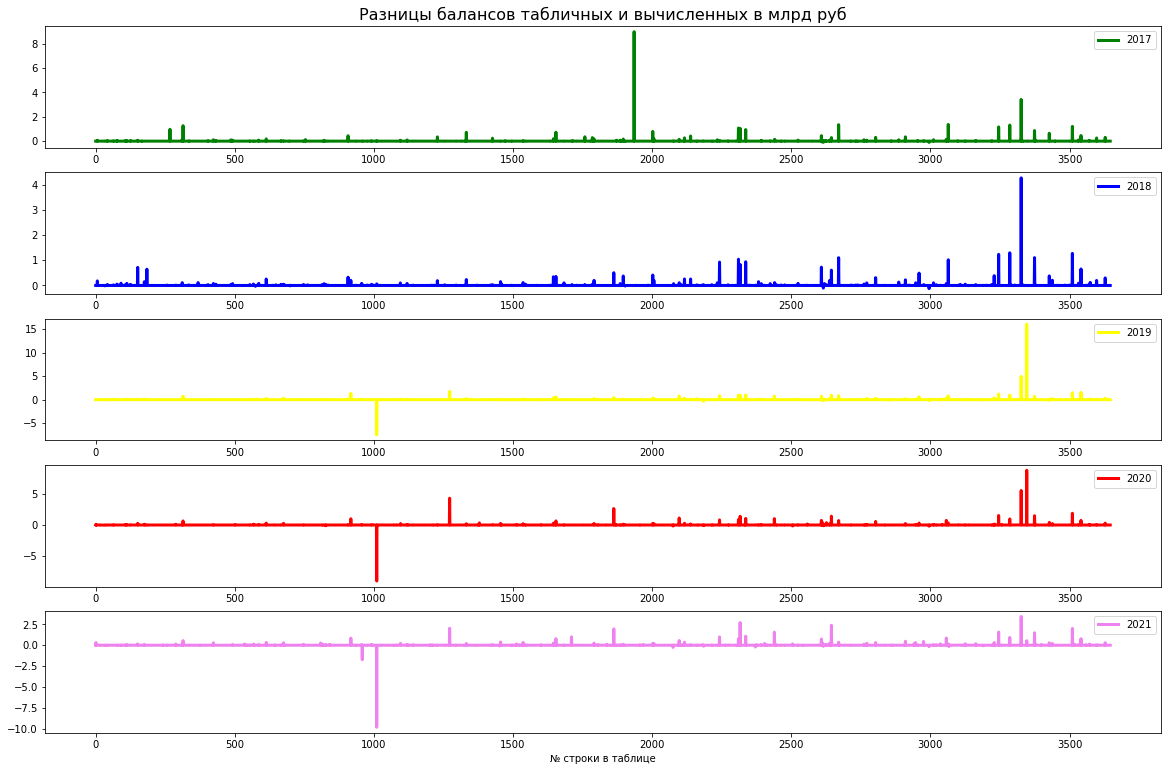

In [19]:
view_2017 = df_set['2017 balance'] - df_set['2017 well_being']
view_2018 = df_set['2018 balance'] - df_set['2018 well_being']
view_2019 = df_set['2019 balance'] - df_set['2019 well_being']
view_2020 = df_set['2020 balance'] - df_set['2020 well_being']
view_2021 = df_set['2021 balance'] - df_set['2021 well_being']

mask = (view_2018 < 50)
view_2018 = view_2018[mask]

#визуализация графиков
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(20, 13))

axes[0].plot(view_2017, label='2017', color='green', lw=3)
axes[0].legend()
axes[1].plot(view_2018, label='2018', color='blue', lw=3)
axes[1].legend()
axes[2].plot(view_2019, label='2019', color='yellow', lw=3)
axes[2].legend()
axes[3].plot(view_2020, label='2020', color='red', lw=3)
axes[3].legend()
axes[4].plot(view_2021, label='2021', color='violet', lw=3)
axes[4].legend()

#установка параметров отображения
axes[0].set_title('Разницы балансов табличных и вычисленных в млрд руб', fontsize=16)
axes[4].set_xlabel('№ строки в таблице');

### Для варианта 2

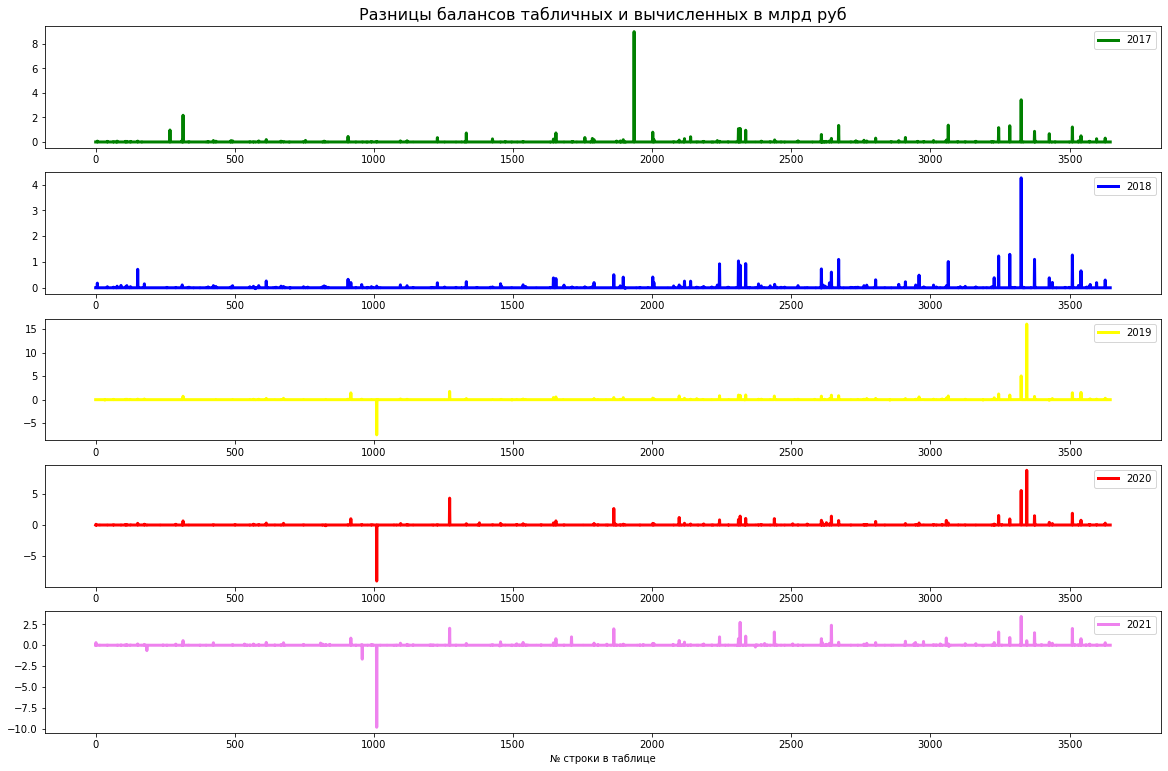

In [23]:
view2_2017 = df_set['2017 balance'] - df_set['2017 well_being2']
view2_2018 = df_set['2018 balance'] - df_set['2018 well_being2']
view2_2019 = df_set['2019 balance'] - df_set['2019 well_being2']
view2_2020 = df_set['2020 balance'] - df_set['2020 well_being2']
view2_2021 = df_set['2021 balance'] - df_set['2021 well_being2']

mask = (view2_2018 < 50)
view2_2018 = view2_2018[mask]

#визуализация графиков
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(20, 13))

axes[0].plot(view2_2017, label='2017', color='green', lw=3)
axes[0].legend()
axes[1].plot(view2_2018, label='2018', color='blue', lw=3)
axes[1].legend()
axes[2].plot(view2_2019, label='2019', color='yellow', lw=3)
axes[2].legend()
axes[3].plot(view2_2020, label='2020', color='red', lw=3)
axes[3].legend()
axes[4].plot(view2_2021, label='2021', color='violet', lw=3)
axes[4].legend()

#установка параметров отображения
axes[0].set_title('Разницы балансов табличных и вычисленных в млрд руб', fontsize=16)
axes[4].set_xlabel('№ строки в таблице');

### А теперь убедимся, что оба варианта нашего расчета благосостояния это практически одно и тоже
расчитаем разницу между ними и выведем на графике

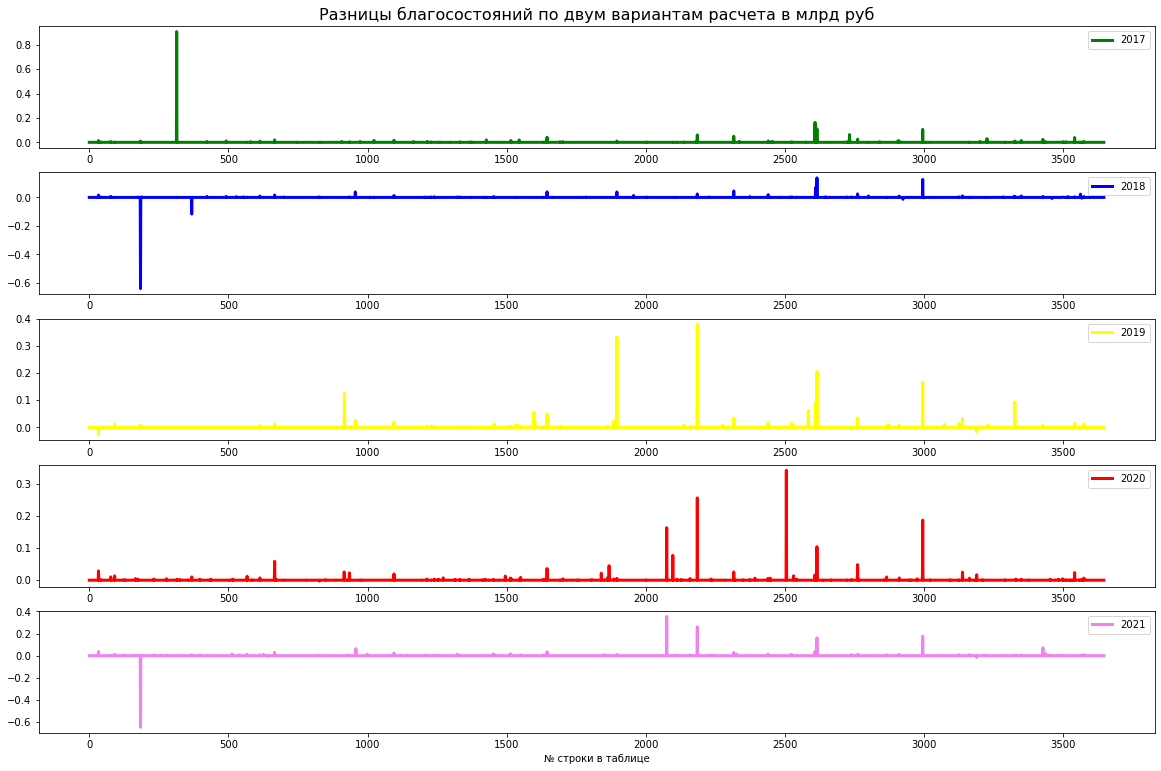

In [22]:
view3_2017 = df_set['2017 well_being'] - df_set['2017 well_being2']
view3_2018 = df_set['2018 well_being'] - df_set['2018 well_being2']
view3_2019 = df_set['2019 well_being'] - df_set['2019 well_being2']
view3_2020 = df_set['2020 well_being'] - df_set['2020 well_being2']
view3_2021 = df_set['2021 well_being'] - df_set['2021 well_being2']


#визуализация графиков
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(20, 13))

axes[0].plot(view3_2017, label='2017', color='green', lw=3)
axes[0].legend()
axes[1].plot(view3_2018, label='2018', color='blue', lw=3)
axes[1].legend()
axes[2].plot(view3_2019, label='2019', color='yellow', lw=3)
axes[2].legend()
axes[3].plot(view3_2020, label='2020', color='red', lw=3)
axes[3].legend()
axes[4].plot(view3_2021, label='2021', color='violet', lw=3)
axes[4].legend()

#установка параметров отображения
axes[0].set_title('Разницы благосостояний по двум вариантам расчета в млрд руб', fontsize=16)
axes[4].set_xlabel('№ строки в таблице');

## ВЫВОДЫ
Необходимо выбрать, что в итоге мы будем принимать за благосостояние? Или мы останавливаемся на "Остатке средств на конец периода" из исходной таблицы или один из представленных показателей.